In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pyart
from wsrlib import *

# requirements:
#  - pyart
#  - boto3
#  - pyproj



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
#name = 'KBUF20160107_123931_V06'
#name = 'KBUF20160806_101141_V06'

def image2xy(x, y, r=0, dim=600, rmax=150000):
    '''
    Convert from image coordinates to (x,y) coordinates offset from radar
    '''
    
    x0 = y0 = dim/2.0 # origin
    x =  (x - x0)*2*rmax/dim
    y = -(y - y0)*2*rmax/dim
    r = r*2*rmax/dim
    
    return x, y, r

In [3]:
import pandas as pd
roosts = pd.read_csv('roost_labels_KBUF2016.csv')

roosts = roosts.loc[roosts['label']=='swallow-roost']
roosts['tot_refl'] = 0

groups = roosts.groupby('filename')

n = len(groups)
for j, (scan, group) in enumerate(groups):

    if (j < 133 or j > 138):
        continue
    
    print('Processing %s (%03d/%03d)' % (scan, j, n))
    
    for i,row in group.iterrows():
        #print(i)
        #print(i, row['track_id'], row['from_sunrise'])
        roosts.loc[i,'tot_refl'] = i*10

display(roosts)


Processing KBUF20160807_095144_V06 (133/434)
Processing KBUF20160807_095507_V06 (134/434)
Processing KBUF20160807_095830_V06 (135/434)
Processing KBUF20160807_100152_V06 (136/434)
Processing KBUF20160807_100521_V06 (137/434)
Processing KBUF20160807_100853_V06 (138/434)


,track_id,filename,from_sunrise,det_score,x,y,r,lon,lat,radius,station,date,time,length,tot_score,avg_score,viewed,user_labeled,label,tot_refl
386,1259-1261,KBUF20160710_092831_V06,-18,0.084,235.400000,278.20,12.000000,-79.13,43.046041,6000.000000,KBUF,20160710,92831,4,-0.269,-0.067250,True,False,swallow-roost,0
387,1259-1261,KBUF20160710_093248_V06,-14,0.191,236.753846,278.35,18.442308,-79.13,43.045403,9221.153846,KBUF,20160710,93248,4,-0.269,-0.067250,True,False,swallow-roost,0
388,1259-1261,KBUF20160710_093706_V06,-9,-0.193,233.650000,296.95,25.050000,-79.14,42.961615,12525.000000,KBUF,20160710,93706,4,-0.269,-0.067250,True,False,swallow-roost,0
389,1259-1261,KBUF20160710_094125_V06,-5,-0.351,235.227963,297.24,33.471622,-79.13,42.960363,16735.810811,KBUF,20160710,94125,4,-0.269,-0.067250,True,False,swallow-roost,0
390,1262,KBUF20160710_095421_V06,8,0.560,166.450000,332.70,23.450000,-79.55,42.798518,11725.000000,KBUF,20160710,95421,5,2.657,0.531400,True,False,swallow-roost,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,2318,KBUF20161007_112015_V06,1,0.271,168.950000,298.50,25.850000,-79.54,42.952545,12925.000000,KBUF,20161007,112015,3,0.994,0.331333,True,False,swallow-roost,0
1886,2318,KBUF20161007_113003_V06,11,0.439,165.892308,306.48,33.750502,-79.56,42.916513,16875.250836,KBUF,20161007,113003,3,0.994,0.331333,True,False,swallow-roost,0
1887,2318,KBUF20161007_113949_V06,20,0.284,170.458841,302.47,36.020393,-79.53,42.934764,18010.196441,KBUF,20161007,113949,3,0.994,0.331333,True,False,swallow-roost,0
2356,2975,KBUF20161129_120746_V06,-17,0.455,357.050000,250.75,19.550000,-78.39,43.169733,9775.000000,KBUF,20161129,120746,2,1.002,0.501000,True,False,swallow-roost,0


In [4]:
print(len(roosts['track_id']))

837


In [14]:
# File name and roost location
name = 'KBUF20160826_101937_V06' # 1907,KBUF20160826_101937_V06,-14,0.657,235.294551,278.52,26.456692
x0, y0, r = image2xy(235.294551,278.52,26.456692)

name = 'KBUF20160826_103825_V06' # 1913,KBUF20160826_103825_V06,5,1.024,64.915009,390.60,52.056629
x0, y0, r = image2xy(64.915009,390.60,52.056629)

# name = 'KBUF20160808_101440_V06' # 1612,KBUF20160808_101440_V06,1,0.863,45.938196,389.39,45.936024
# x0, y0, r = image2xy(45.938196,389.39,45.936024)
print(x0,y0,r)

radar = read_s3(name)

-117542.49549999999 -45300.000000000015 26028.3145


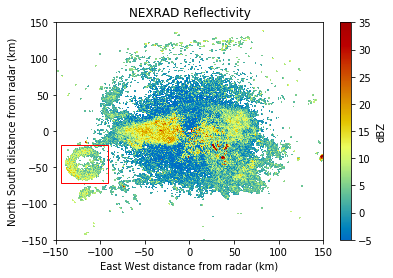

In [16]:
# Plot reflectivity
disp = pyart.graph.RadarDisplay(radar)
rmax = 150 # km
lim = (-rmax, rmax)
disp.plot('reflectivity', 0, title='NEXRAD Reflectivity',
             vmin=-5, vmax=35, colorbar_label='dBZ')
disp.set_limits(xlim=lim, ylim=lim)

# Plot roost
rect = patches.Rectangle(((x0-r)/1000,(y0-r)/1000),2*r/1000,2*r/1000,linewidth=1,edgecolor='r',facecolor='none')
plt.gca().add_patch(rect)

plt.show()

In [17]:
data, y, x, elev = radar2mat(radar, coords='cartesian', dim=600, r_max=150000)
print(data['reflectivity'].shape)

(5, 600, 600)


In [18]:
rng, az, elev, dbz = get_volumes(radar, coords='antenna')

# Convert to reflectivity and set nan --> zero
refl, _ = z_to_refl(idb(dbz))
refl[np.isnan(refl)] = 0

In [19]:
## Pulse volume coordinate conversions

# Get range along ground and height above ground
[ground_rng, height] = slant2ground(rng, elev)

# Convert compass bearing to mathematical angle
theta = cmp2pol(az)

# Convert to X,Y coordinates of each pulse volume
[x, y] = pol2cart(theta, ground_rng)

In [20]:
# Convert roost location to lat / lon
[angle, dist_from_radar] = cart2pol(x0, y0)
bearing = pol2cmp(angle)

from pyproj import Geod
geodesic = Geod(ellps='WGS84')
roost_lon, roost_lat, _ = geodesic.fwd(radar.longitude['data'][0], 
                                       radar.latitude['data'][0] , 
                                       bearing, 
                                       dist_from_radar)

#roost_lon = do_alias(roost_lon, 180)
print('lat,lon=%.4f,%.4f' % (roost_lat, roost_lon))

lat,lon=42.5320,-80.1675


In [21]:
DIST = np.sqrt( (x-x0)**2 + (y-y0)**2 ) # distance of each sample volume to center of roost

edges = np.arange(0, 1.5*r, 500)
nbins = len(edges)-1

density = np.full(nbins, np.nan)

for i in range(nbins):
    inds = (DIST >= edges[i]) & (DIST < edges[i+1]) # & (elev < 0.55)
    density[i] = np.sum(refl[inds])

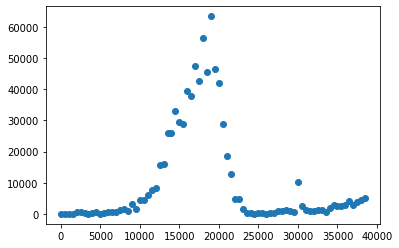

In [22]:
bin_start = edges[:-1]
plt.plot(bin_start, density, 'o')
plt.show()

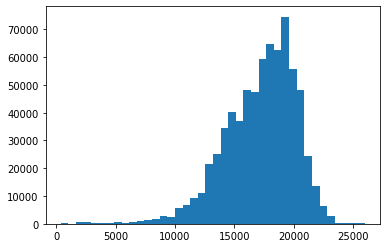

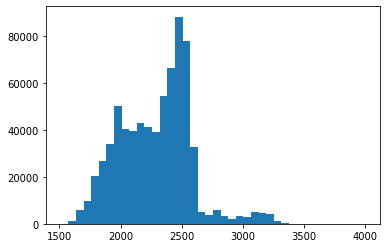

In [23]:
inds = DIST < r
plt.hist(DIST[inds], weights=refl[inds], bins=40)
plt.show()

inds = (DIST < r) & (height < 4000)
plt.hist(height[inds], weights=refl[inds], bins=40)
plt.show()